In [1]:
# Import all relevant libraries

import pandas as pd

from sklearn import linear_model
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data collection

df = pd.DataFrame(pd.read_csv('bike_sharing_train.csv', parse_dates = ['datetime']) )
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

12 columns and 10886 rows.

### Columns : 

**datetime** - hourly date + timestamp  

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals

EDA : 

Datetime : 
    - Convert it into a date format
    - le découper, et identifier la distribution des réservations par heure, et par date (début du mois, milieu du mois


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Missing values

<AxesSubplot:>

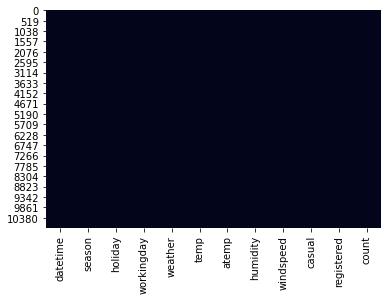

In [4]:
df.isnull().sum().sort_values() #there are no missing values
sns.heatmap(df.isna(), cbar=False)

#another way
#import missingno as msno
#msno.matrix(df)

No missing values

## Duplicates values

In [6]:
df[df.duplicated() == True]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


No duplicates

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

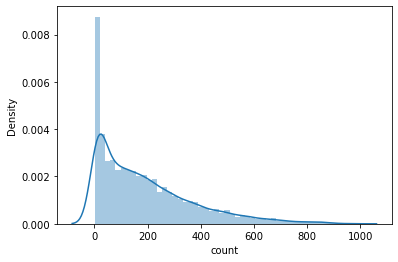

In [7]:
sns.distplot(df['count'], bins = 50)

Quelles variables pourraient être de meilleurs prédicteurs du nombre ?

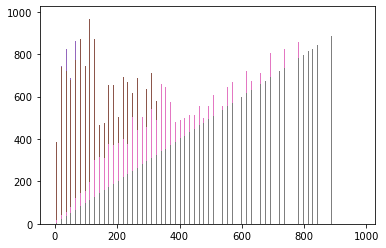

In [9]:
for col in df.select_dtypes('integer') : 
    
    plt.bar(x = df[col], height = df['count'], width = 0.2)


#plt.bar(x = df['weather'], height = df['count'], width = 0.2)

Weather seems to be a good predictor, since rentals seem to be higher when whether is good.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

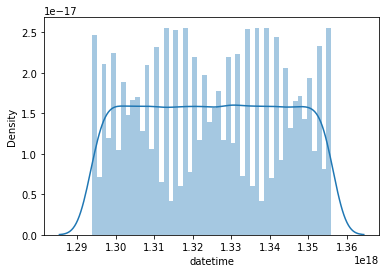

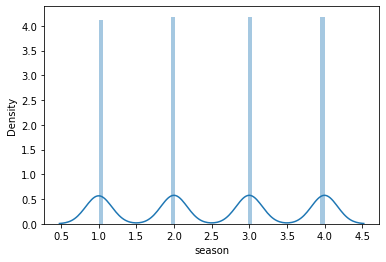

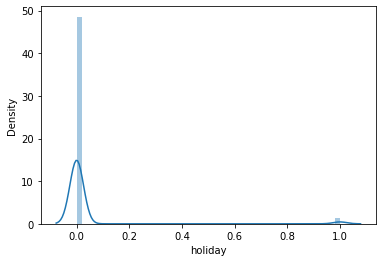

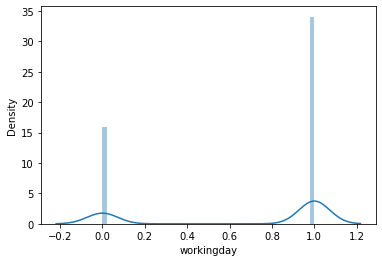

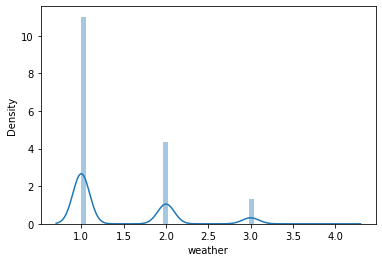

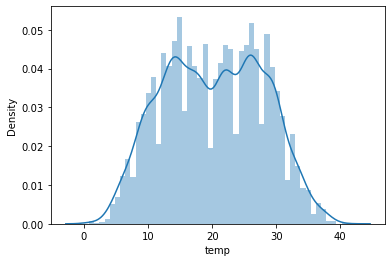

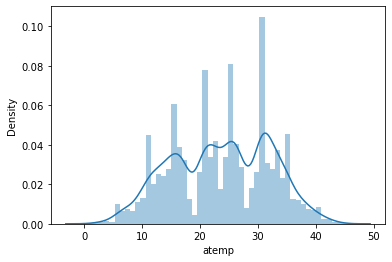

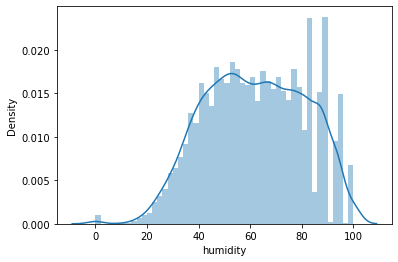

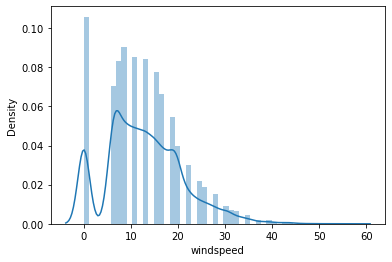

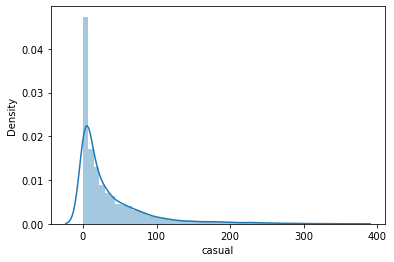

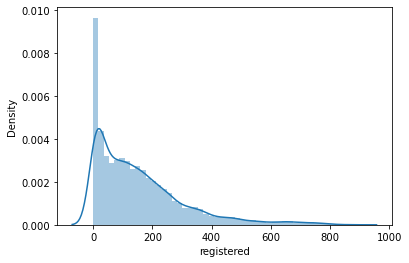

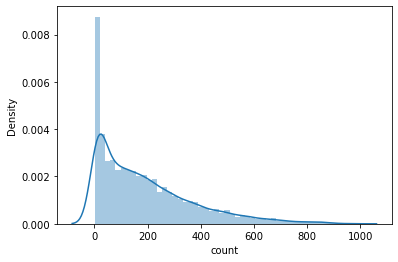

In [10]:
for col in df.select_dtypes(exclude = 'object'): 
    plt.figure()
    sns.distplot(df[col], bins = 50)

<AxesSubplot:>

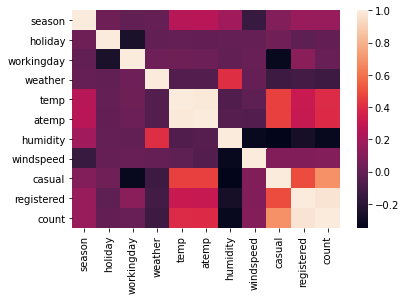

In [11]:
sns.heatmap(df.corr())

- Columns atemp and temp are tightly correlated. Maybe we should keep only temp
- working day VS holiday, should we keep them both ? 
- 

## Bivariate analysis 


In [12]:
# Target versus categorical variables (bar charts)

#for col in df.select_dtypes('integer'): 
 #   plt.figure()
  #  plt.bar(x = df[col], height = df['count'], width = 0.2, tick_label = col)

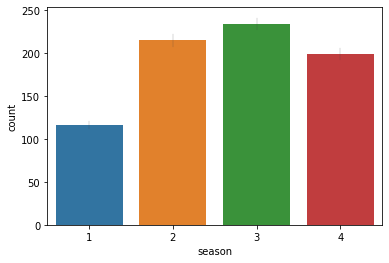

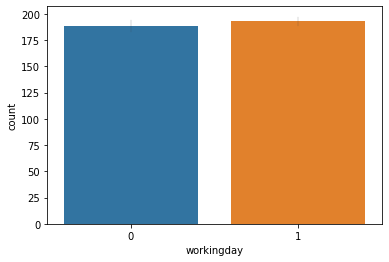

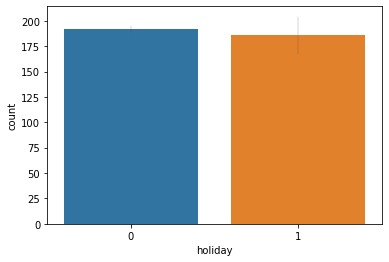

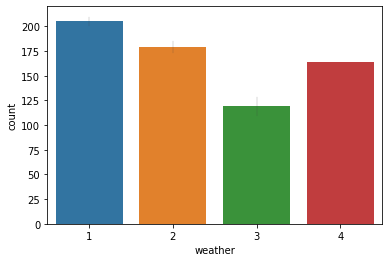

In [13]:
cat_variables = ['season', 'workingday','holiday','weather']

for col in cat_variables: 
    plt.figure()
    sns.barplot(x = col, y = 'count', data = df, errwidth = 0.2)

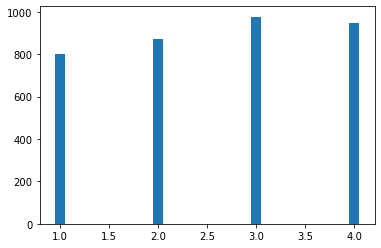

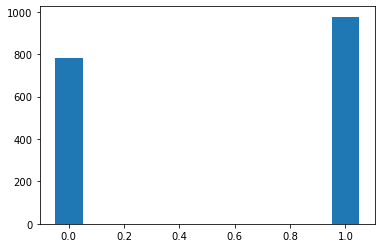

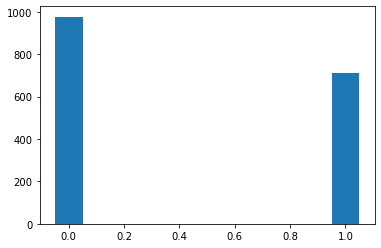

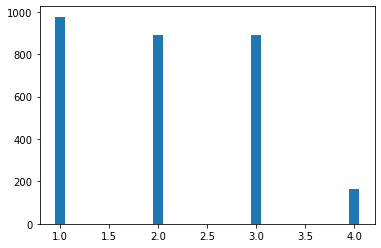

In [14]:
cat_variables = ['season', 'workingday','holiday','weather']

for col in cat_variables: 
    plt.figure()
    plt.bar(x = df[col], height = df['count'], width = 0.1, label = col)


<Figure size 432x288 with 0 Axes>

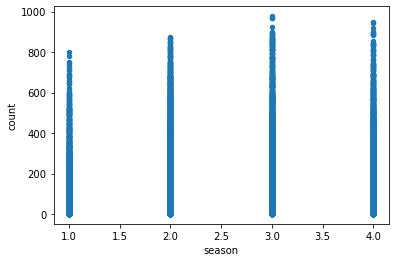

<Figure size 432x288 with 0 Axes>

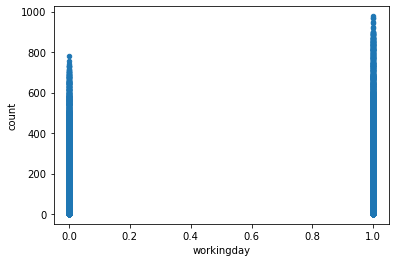

<Figure size 432x288 with 0 Axes>

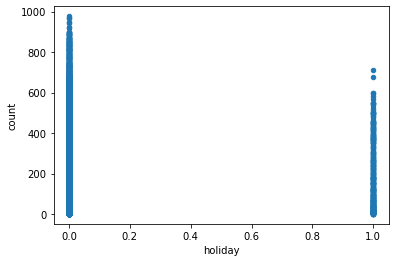

<Figure size 432x288 with 0 Axes>

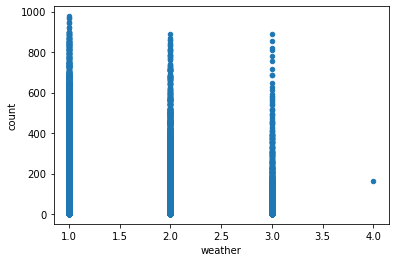

In [24]:
for col in cat_variables: 
    plt.figure()
    df.plot.scatter(x=col, y="count")


**fall is the season where people use bikes the most**

Season and whether have impact, and seem to be good predictors. 


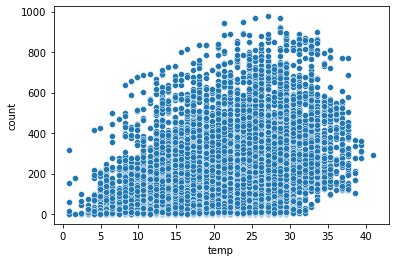

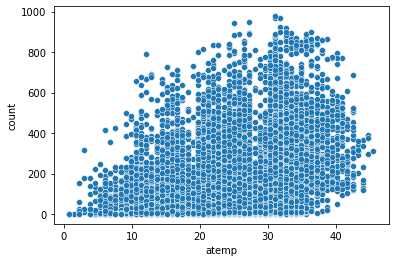

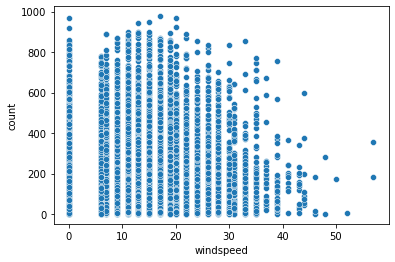

In [13]:
# Target versus numerical variables

for col in df.select_dtypes('float'): 
    plt.figure()
    sns.scatterplot(x = col, y = 'count', data = df )

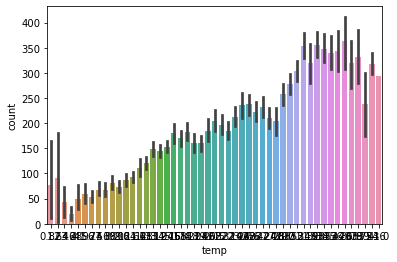

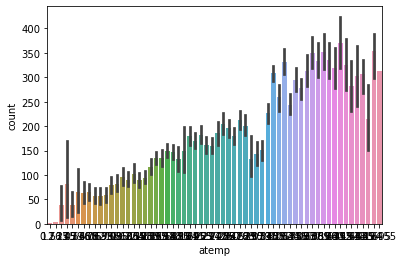

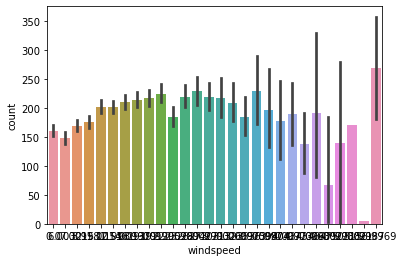

In [121]:
for col in df.select_dtypes('float'): 
    plt.figure()
    sns.barplot(x = col, y = 'count', data = df)

## Focus on relationship between time and target

### Count per hour

In [54]:
df_time = df.copy()

df_time['hour'] = df['datetime'].dt.hour
df_time['year'] = df['datetime'].dt.year

In [38]:
def plot_by_hour(data, year=None, agg='sum'):
    dd = data       #flag 1
    if year :       #flag 2
        dd = dd[dd.datetime.dt.year == year]  
    dd.loc[:, ('hour')] = dd.datetime.dt.hour  #flag 3
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()  #flag 4
    return by_hour.plot(kind='bar', title="year = {0}".format(year),figsize=(15,5), width=0.9) #flag 5

<AxesSubplot:title={'center':'year = None'}, xlabel='hour'>

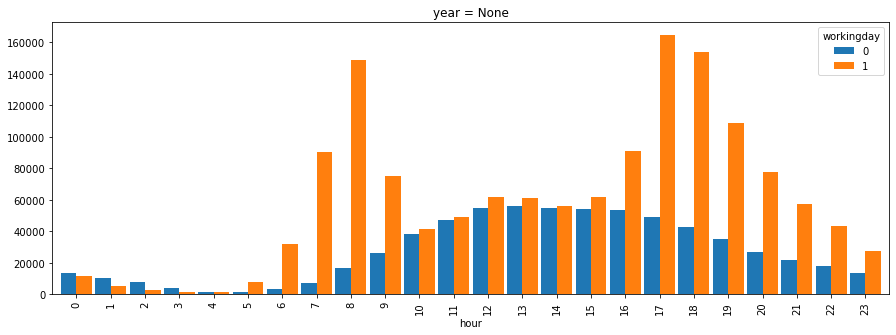

In [39]:
plot_by_hour(df)

In [95]:
#temp = df_time.groupby(['year','hour'])['count'].sum().unstack()

#temp = {}
#for i in df_time['workingday'].unique() : 
#    temp[i] = df[df_time['workingday'] ==i].groupby(['hour'])['count'].sum()
#for k in temp :
#    temp[k].plot(kind='bar', figsize=(15,5), width=0.9)

#sns.histplot(df_time[df_time['workingday'] ==1].hour, bins = 50)
#sns.histplot(df_time.groupby(['year','hour'])['hour'].sum(), bins = 50)

In [107]:

temp = df_time.groupby(['hour','workingday'])['count'].sum().unstack()

<AxesSubplot:xlabel='hour'>

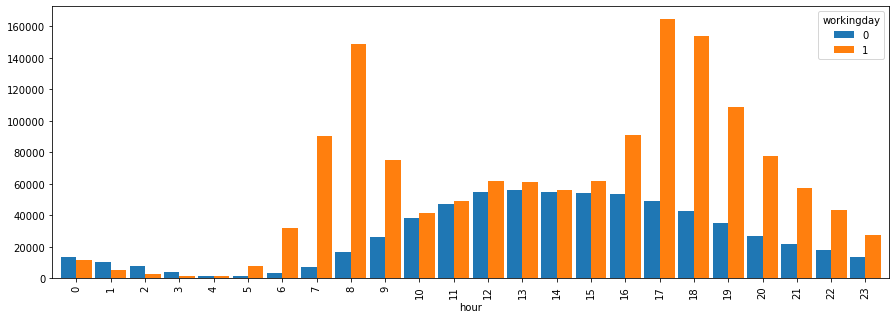

In [108]:
temp.plot(kind='bar', figsize=(15,5), width=0.9)

In [75]:
df_time[df_time['hour'] ==1].groupby('year')['hour'].sum()

year
2011    226
2012    228
Name: hour, dtype: int64

In [53]:
df_time[df_time['workingday'] ==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


In [56]:
df_time

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012


In [132]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540


### Count per month

In [109]:
df_time['month'] = df['datetime'].dt.month

<AxesSubplot:xlabel='month'>

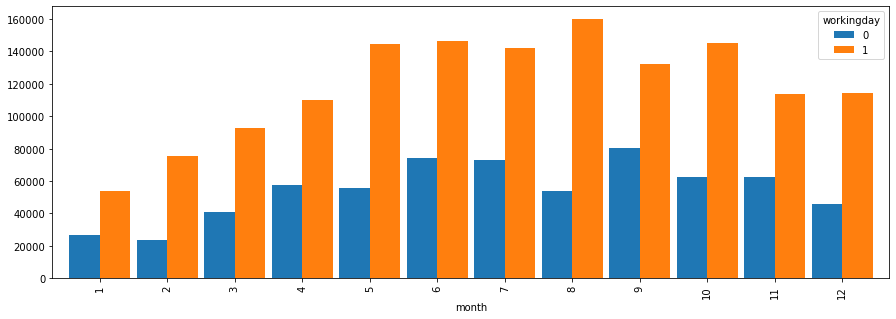

In [111]:
temp2 = df_time.groupby(['month','workingday'])['count'].sum().unstack()
temp2.plot(kind='bar', figsize=(15,5), width=0.9)

<AxesSubplot:xlabel='month'>

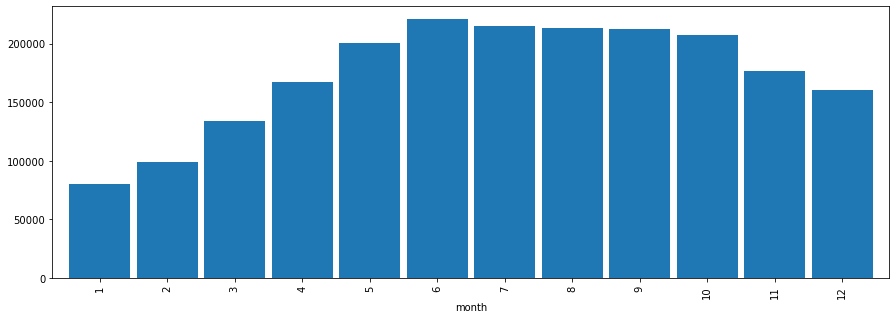

In [117]:
df_time.groupby(['month'])['count'].sum().plot(kind='bar', figsize=(15,5), width=0.9)


Bikes are more rent during summer time and within working days.

In [127]:
class mean_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,h):
        a = self.df["hour"] == h
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

Text(0.5, 0, 'heure de la journée')

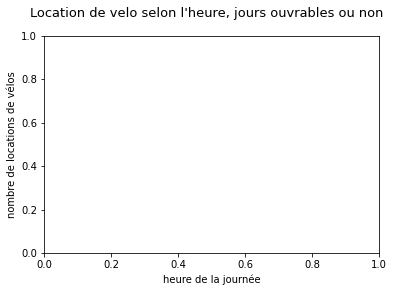

In [128]:
fig=plt.figure()
fig.suptitle('Location de velo selon l\'heure, jours ouvrables ou non', fontsize=13)
plt.ylabel('nombre de locations de vélos')
plt.xlabel('heure de la journée')

In [131]:
moy0=mean_30(df_time[df_time['workingday']==0])
moy0.view()

In [188]:
df_clean = df_time.copy()
df_clean = df_time.drop(columns = ['atemp', 'datetime','year','datetime','registered','casual'])
df_clean

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month
0,1,0,0,1,9.84,81,0.0000,16,0,1
1,1,0,0,1,9.02,80,0.0000,40,1,1
2,1,0,0,1,9.02,80,0.0000,32,2,1
3,1,0,0,1,9.84,75,0.0000,13,3,1
4,1,0,0,1,9.84,75,0.0000,1,4,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,19,12
10882,4,0,1,1,14.76,57,15.0013,241,20,12
10883,4,0,1,1,13.94,61,15.0013,168,21,12
10884,4,0,1,1,13.94,61,6.0032,129,22,12


## Machine Learning 

## Regression linéaire 

In [189]:
x_train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month
2815,3,0,1,1,27.88,83,6.0032,5,30,5,7
8695,3,0,0,1,36.90,39,19.9995,197,253,16,8
8406,3,0,1,1,32.80,41,16.9979,56,220,15,7
1543,2,0,0,2,14.76,93,7.0015,3,2,4,4
4952,4,0,0,1,13.12,45,16.9979,35,165,10,11
...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,47,11.0014,6,32,2,1
5191,4,0,0,1,11.48,61,19.0012,15,134,9,12
5390,4,0,0,1,11.48,48,16.9979,27,207,16,12
860,1,0,0,1,15.58,17,35.0008,6,16,7,2


In [190]:
# Préparation des variables 

y = df_clean['count']
x = df_clean.drop(columns = 'count')

# Répartition des données Train en train et en validation 

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Création du modèle

reg = linear_model.LinearRegression()

# Entrainement du modèle 

reg.fit(x_train, y_train)

LinearRegression()

In [191]:
reg.predict(x_valid)

array([285.57644836,   4.52618023, 245.8649291 , ..., 267.6451673 ,
        -5.18173996, 202.29629079])

In [192]:
#score

print ("Training Score Regression Linéare : ", str(reg.score(x_train,y_train)))
print ("Training Score Regression Linéare : ", str(reg.score(x_valid,y_valid)))

Training Score Regression Linéare :  0.33464671556773373
Training Score Regression Linéare :  0.34329697100497525


In [208]:
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test_clean = test.copy()
test_clean['hour'] = test['datetime'].dt.hour
test_clean['month'] = test['datetime'].dt.month

In [222]:
test_clean.drop(['atemp', 'datetime'], axis = 1, inplace = True)
test_clean

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,month
0,1,0,1,1,10.66,56,26.0027,0,1
1,1,0,1,1,10.66,56,0.0000,1,1
2,1,0,1,1,10.66,56,0.0000,2,1
3,1,0,1,1,10.66,56,11.0014,3,1
4,1,0,1,1,10.66,56,11.0014,4,1
...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,19,12
6489,1,0,1,2,10.66,60,11.0014,20,12
6490,1,0,1,1,10.66,60,11.0014,21,12
6491,1,0,1,1,10.66,56,8.9981,22,12


In [194]:
# Prédiction
#test.drop(columns = ['count',



In [219]:
test_clean.drop(columns = ['datetime'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,4,1
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,12
6489,1,0,1,2,10.66,12.880,60,11.0014,20,12
6490,1,0,1,1,10.66,12.880,60,11.0014,21,12
6491,1,0,1,1,10.66,13.635,56,8.9981,22,12


In [223]:
df_clean

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month
0,1,0,0,1,9.84,81,0.0000,16,0,1
1,1,0,0,1,9.02,80,0.0000,40,1,1
2,1,0,0,1,9.02,80,0.0000,32,2,1
3,1,0,0,1,9.84,75,0.0000,13,3,1
4,1,0,0,1,9.84,75,0.0000,1,4,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,19,12
10882,4,0,1,1,14.76,57,15.0013,241,20,12
10883,4,0,1,1,13.94,61,15.0013,168,21,12
10884,4,0,1,1,13.94,61,6.0032,129,22,12


In [224]:
reg.predict(test_clean)

array([  9.58640185,  13.83455048,  21.51182324, ..., 274.25175753,
       290.65091064, 278.10953281])

## Gradient boosting

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,month
2815,3,0,1,1,27.88,83,6.0032,5,7
8695,3,0,0,1,36.90,39,19.9995,16,8
8406,3,0,1,1,32.80,41,16.9979,15,7
1543,2,0,0,2,14.76,93,7.0015,4,4
4952,4,0,0,1,13.12,45,16.9979,10,11
...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,47,11.0014,2,1
5191,4,0,0,1,11.48,61,19.0012,9,12
5390,4,0,0,1,11.48,48,16.9979,16,12
860,1,0,0,1,15.58,17,35.0008,7,2


In [229]:
greg = GradientBoostingRegressor(random_state=0)

greg.fit(x_train,y_train)

GradientBoostingRegressor(random_state=0)

In [231]:

greg.score(x_valid,y_valid)

0.7816146212874555